In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
polynomial_train = pd.read_csv("/content/drive/My Drive/WOC/polynomial_train.csv")
polynomial_train.describe()

Mounted at /content/drive


,Unnamed: 0,A,B,C,label
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,24999.500000,66.122302,253.565492,-149.676103,4.760874e+03
std,14433.901067,2851.432362,711.838429,71.174917,2.583795e+06
min,0.000000,-11086.177958,-3065.807495,-454.476231,-7.994990e+07
25%,12499.750000,-1848.172530,-224.843278,-197.796603,-1.203886e+04
50%,24999.500000,60.054480,250.991294,-149.899035,1.565375e-02
75%,37499.250000,1982.912601,736.291355,-101.725114,1.520390e+04
max,49999.000000,11876.854852,3973.984169,136.969097,1.085096e+08


# Implementation

**Polynomial Regression Implementation Details**:- \\
I have created a Class named PolynomialRegression \\
in the init method I have defined all hyperparameters,theta vector \\
I have created a fit function for training using the below formulae \\
I have created a predict function which makes predictions and a function which calculates few machine learning metrics
\begin{equation}
  f(\vec{𝜽}) = \vec{𝜽}.\vec{X}\\
\end{equation}
where theta is the weights vector and $\vec{X}$ is the polynomial of the given features with all possible terms upto degree n(hyperparameter)
# $\text{Feature Standardization:- }$
\begin{equation}
  x_{i} = \frac{x_{i} - \overline{x}}{μ}\\
\end{equation}
# $\text{Cost Function:-}$
$\text{with L1 and L2 regularization}$
\begin{equation}
  J(\vec{Θ}) = \frac{1}{2m}∑(\hat{Y}-Y)^2 + α_{reg}*\frac{λ_{1}}{2m}*∑|Θ_{i} | + (1-α_{reg})*\frac{λ_{2}}{2m}*∑|Θ_{i}^{2} | \\
  \implies J(Θ) =  \frac{1}{2m}∑(\vec{Θ}.\vec{X}-\vec{Y})^2+α_{reg}*\frac{λ_{1}}{2m}*∑|Θ_{i} | + (1-α_{reg})*\frac{λ_{2}}{2m}*∑|Θ_{i}^{2} |\\
\end{equation}
# $\text{Gradient Descent:- }$
\begin{equation}
  \frac{∂J}{∂\vec{Θ}}=\frac{1}{m}(\vec{{X}^{T}}).(\hat{Y}-Y)+\frac{∂L_{1}}{∂\vec{Θ}}+\frac{∂L_{2}}{∂\vec{Θ}} \\
\frac{∂L_{1}}{∂\vec{Θ}} = α_{reg}*λ_{1}*sign(\vec{Θ})\\
\frac{∂L_{2}}{∂\vec{Θ}} = α_{reg}*λ_{2}*\vec{Θ}\\
Θ:=Θ - α*\frac{∂J}{∂Θ} \\
\end{equation}
# $\text{Prediction:- }$
\begin{equation}
Y_{pred} =  vec{X}.\vec{\Theta}
\end{equation}
# $\text{Scoring Metrics:- }$ 
\begin{equation}
R^{2} = 1 - \frac{RSS}{TSS} \\
\end{equation}
$\tag*{RSS = sum of square of residuals}$
$\tag*{TSS = total sum of squares_____}$
\begin{equation}
MSE = \frac{1}{m}∑_{i=0}^{m-1}(Y_{i}-\hat{Y}_{i})^2 \\
MAE = \frac{1}{m}∑_{i=0}^{m-1}|Y_{i}-\hat{Y}_{i}| \\
RMSE = \sqrt{\frac{1}{m}∑_{i=0}^{m-1}(Y_{i}-\hat{Y}_{i})^2  }\\
\end{equation}


# Model

In [2]:
class PolynomialRegression:  
    def __init__(self,deg,learning_rate=0.001,epochs=10000,lambda1 = 0, lambda2 = 0.02,tol = 0.001,reg_alpha=0):
        self.lr = learning_rate
        self.epochs=epochs
        self.theta = None
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.deg = deg
        self.tol = tol
        self.reg_alpha = reg_alpha
        #for the given dataset only 3 features are given so using lasso regularization might affect the performance of the model so reg_alpha is set to 0

    def Polyfeatures(self,X):
        n_samples = X.shape[0]
        n_features = X.shape[1] #taking it as 3 from the dataset
        X_poly = np.ones((n_samples,1))
        #generating all possible combinations for a degree
        for a in range(0,self.deg+1):
          for b in range(0,self.deg+1):
            for c in range(0,self.deg+1):
              if a+b+c!=0 and a+b+c<=self.deg:
                #print(f"a {a} b {b} c {c}")
                X_poly = np.c_[X_poly,np.multiply(np.multiply(np.power((X[:,0]),a),np.power(X[:,1],b)),np.power(X[:,2],c))]
        return X_poly
    def fit(self,X,Y,show_plt=True,show_cst = True,plt_typ='normal'):
        #standardize the input
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        n_samples = X.shape[0]
        #generate the polynomial
        X_poly = self.Polyfeatures(X)
        n_features_poly = X_poly.shape[1]
        costs = []
        #intializing theta using xavier initilization
        self.theta = np.random.randn((n_features_poly))*np.sqrt(2/n_features_poly)
        for epoch in range(self.epochs):
            y_pred = np.dot(X_poly,self.theta)
            err = y_pred - Y
            #cost function with L1,L2 regularization
            cost = (1/(2*n_samples))*(np.sum((err)**2)+(self.reg_alpha)*self.lambda1*np.sum(np.abs(self.theta))+(1-self.reg_alpha)*self.lambda2*np.sum((self.theta)**2))
            costs.append(cost)
            #gradient descent
            dl1 = (self.reg_alpha)*self.lambda1*np.sign(self.theta)
            dl2 = (1-self.reg_alpha)*self.lambda2*self.theta
            if self.reg_alpha:
              dl1[0] = 0 #exclude bias from L1 of theta
            grads = (X_poly.T.dot(err) + dl1 + dl2)/(X_poly.shape[0])
            self.theta -= self.lr*grads
            if epoch%1000==0 and show_cst:
              print("Cost after {}th operation is : {}".format(epoch,cost))
            #if curve flattens early
            if np.abs(err).mean()< self.tol:
              break
        if show_plt==True :
          plt.figure(figsize=(10,10))
          if plt_typ=='normal':
            plt.plot(np.arange(self.epochs),costs,'r',5)
          else:
            plt.plot(np.arange(self.epochs),[np.log(x) for x in costs],'r',5)
    def predict(self,X):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        X_poly = self.Polyfeatures(X)
        n_features_poly = X_poly.shape[1]
        y_predicted = np.dot(X_poly,self.theta)
        return y_predicted
    def R2score(self,X,Y):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        X_poly = self.Polyfeatures(X)
        Y_pred = np.dot(X_poly,self.theta)
        ss_res = np.sum((Y_pred-Y)**2)
        ss_tot = np.sum((Y-np.mean(Y))**2)
        R2_score = 1 - (ss_res)/(ss_tot)
        return R2_score
    def rmse(self,X,Y):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        X_poly = self.Polyfeatures(X)
        Y_pred = np.dot(X_poly,self.theta)
        rmse = (np.mean((Y-Y_pred)**2))**(0.5)
        return rmse
    def show_metrics(self,X,Y):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        X_poly = self.Polyfeatures(X)
        Y_pred = np.dot(X_poly,self.theta)
        ss_res = np.sum((Y_pred-Y)**2)
        ss_tot = np.sum((Y-np.mean(Y))**2)
        R2_score = 1 - (ss_res)/(ss_tot)
        mse = np.mean((Y-Y_pred)**2)
        mae = np.mean(np.abs((Y-Y_pred)))
        rmse = (np.mean((Y-Y_pred)**2))**(0.5)
        print(f"R2:- {R2_score} MSE:- {mse} MAE:- {mae} RMSE:- {rmse}")
    def tune_hyp_gridsearch(self,X,Y,X_cv,Y_cv):
        best_deg = self.deg
        best_lr = self.lr
        best_lambda1 = self.lambda1
        best_lambda2 = self.lambda2
        best_score = float("-inf")
        scores = []
        for deg in range(2,self.deg+1):
          for alpha in [0.1,0.01,0.001]:
            for lambda1 in [0,0.1,0.01]:
              for lambda2 in [0,0.1,0.01]:
                if ((deg>=4 and alpha==0.1) and lambda1==0) and (lambda2==0 or lambda2==0.1):
                  lambda2=0.01
                self.lambda1 = lambda1
                self.lambda2 = lambda2
                self.deg = deg
                self.lr = alpha
                self.epochs = 5000
                self.fit(X,Y,show_cst = False,show_plt = False)
                score = self.R2score(X_cv,Y_cv)
                scores.append(score)
                print(f"Tried degree: {deg}, learning rate: {alpha}, lambda1: {lambda1}, lambda2: {lambda2} ==> got score:- {score}")
                if score > best_score:
                  best_deg = self.deg
                  best_lr = alpha
                  best_lambda1 = lambda1
                  best_lambda2 = lambda2
                  best_score = score
        self.lambda1 = best_lambda1
        self.lambda2 = best_lambda2
        self.deg = best_deg
        self.lr = best_lr
        print(f"Best degree: {best_deg}, Best alpha: {best_lr}, Best lambda1: {best_lambda1}, Best lambda2: {best_lambda2}")
    def rand_search(self,X,Y,X_cv,Y_cv,deg):
        self.deg=deg
        hyperparams = {
            'learning_rate': [0.001,0.01,0.05,0.1],
            'lambda2':[0.01,0.05,0.1,0.005],
        }
        n_iter = 10
        self.epochs = 8000
        best_score = 1e14
        best_params = {}
        for i in range(n_iter):
            self.lambda2 = hyperparams['lambda2'][np.random.randint(2)]
            self.lr = hyperparams['learning_rate'][np.random.randint(2)]
            self.fit(X,Y,show_cst=False,show_plt=False)
            curr_score = self.rmse(X_cv,Y_cv)
            if best_score > curr_score:
              best_score=curr_score
              best_params = {'degree':deg,'lambda2':self.lambda2,'learning rate':self.lr}
            #print(f"score:-{curr_score} for degree:-{deg},for lambda2:-{self.lambda2},for learning rate:-{self.lr}")
        print(f"best score:-{best_score} for {best_params}")
        return best_params


# DATA ANALYSIS AND PROCESSING PART

<Axes: >

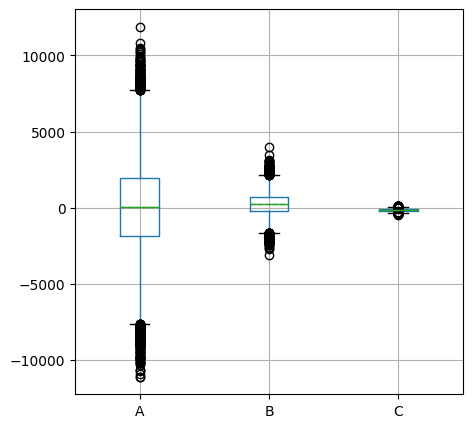

In [3]:
polynomial_train.iloc[:,1:4].boxplot(meanline=True, showmeans=True,figsize=(5, 5))

In [4]:
polynomial_train_normalized = polynomial_train.copy()
"""for column in polynomial_train_normalized.columns:
  if column!='label' and column!='0':
    polynomial_train_normalized[column] = (polynomial_train_normalized[column]-polynomial_train_normalized[column].mean())/polynomial_train_normalized[column].std()"""
ratio_t = 0.70
ratio_cv = 0.15
polynomial_train_normalized=polynomial_train_normalized.sample(frac=1)
total_rows = polynomial_train_normalized.shape[0]
total_train = int(total_rows*ratio_t)
total_cv = int(total_rows*ratio_cv)
print(total_rows)
print(total_train)
X_train=  polynomial_train_normalized.iloc[:total_train,1:4].to_numpy()
X_cv = polynomial_train_normalized.iloc[total_train:total_train+total_cv,1:4].to_numpy()
X_test =  polynomial_train_normalized.iloc[total_train+total_cv:,1:4].to_numpy()
Y_train = polynomial_train_normalized.iloc[:total_train,-1].to_numpy()
Y_cv = polynomial_train_normalized.iloc[total_train:total_train+total_cv,-1].to_numpy()
Y_test =  polynomial_train_normalized.iloc[total_train+total_cv:,-1].to_numpy()
polynomial_train.describe()

50000
35000


,Unnamed: 0,A,B,C,label
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,24999.500000,66.122302,253.565492,-149.676103,4.760874e+03
std,14433.901067,2851.432362,711.838429,71.174917,2.583795e+06
min,0.000000,-11086.177958,-3065.807495,-454.476231,-7.994990e+07
25%,12499.750000,-1848.172530,-224.843278,-197.796603,-1.203886e+04
50%,24999.500000,60.054480,250.991294,-149.899035,1.565375e-02
75%,37499.250000,1982.912601,736.291355,-101.725114,1.520390e+04
max,49999.000000,11876.854852,3973.984169,136.969097,1.085096e+08


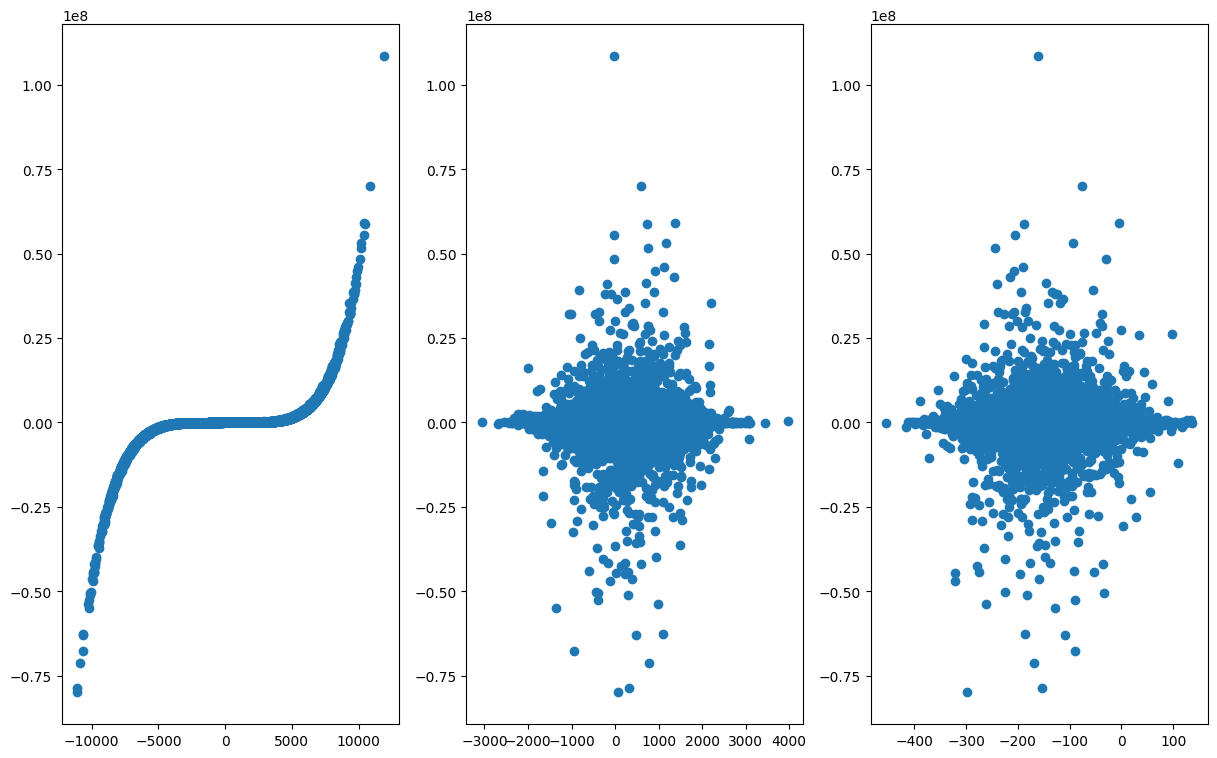

In [5]:
plt.figure(figsize=(20,20))
plots=[]
for i in range(3):
  ax=plt.subplot2grid((2,4),(1,i))
  ax.scatter(polynomial_train[chr(ord('A')+i)],polynomial_train['label'])

In [6]:
print(X_train.shape)

(35000, 3)


# Training and testing

Cost after 0th operation is : 3371990474329.5654
Cost after 1000th operation is : 487429515824.3155
Cost after 2000th operation is : 428629199896.5474
Cost after 3000th operation is : 395253165427.91144
Cost after 4000th operation is : 375769080970.31036
Cost after 5000th operation is : 364389275324.42554
Cost after 6000th operation is : 357742087517.305
Cost after 7000th operation is : 353859005886.11127
Cost after 8000th operation is : 351590475454.1718
Cost after 9000th operation is : 350265102845.4106
R2:- 0.8890197668765059 MSE:- 837798342244.7524 MAE:- 474360.29199173494 RMSE:- 915313.248153195


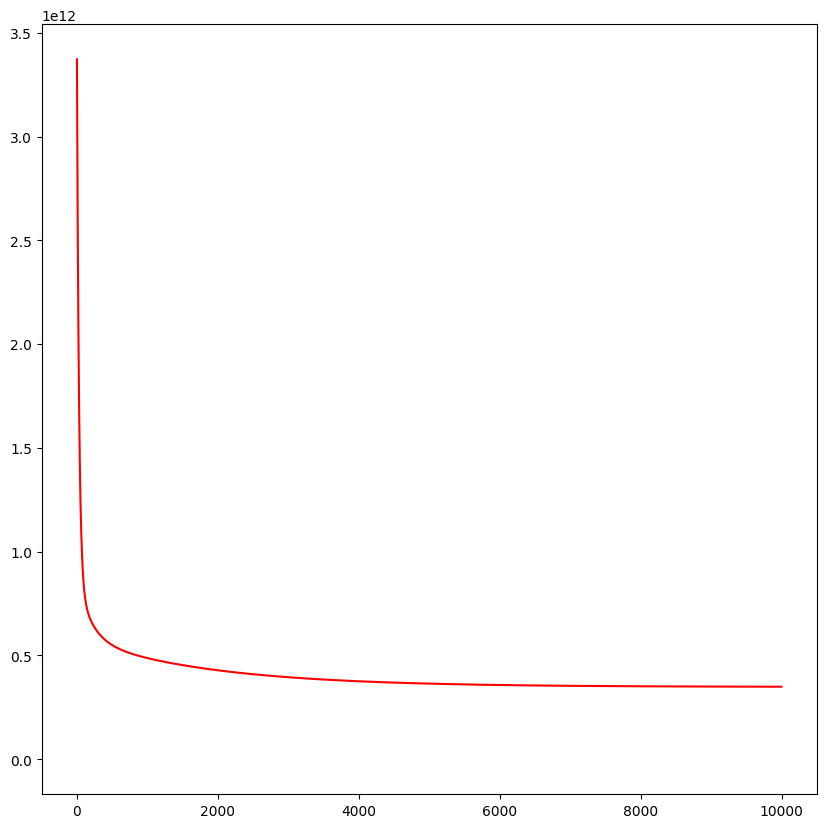

In [10]:
model = PolynomialRegression(deg=3,lambda1=0,lambda2=0.02)
#model.Polyfeatures(X_train)
#X_train
model.fit(X=X_train,Y=Y_train)
model.show_metrics(X_cv,Y_cv)

In [ ]:
#print(model.theta)
cnt =1
print(model.theta[0])
for a in range(model.deg+1):
  for b in range(model.deg+1):
    for c in range(model.deg+1):
      if a+b+c!=0 and a+b+c<=model.deg:
        print(f"{model.theta[cnt]} x",end="")
        if a!=0:
          print(f"(X1)^{a}",end="")
        if b!=0:
          print(f"(X2)^{b}",end="")
        if c!=0:
          print(f"(X3)^{c}",end="")
        print("\n")
        cnt+=1

9060.64932211856
-44876.866724152926 x(X3)^1

-3230.1210014731428 x(X3)^2

3142.140403112874 x(X3)^3

-38015.857143054774 x(X2)^1

1444.5296857576445 x(X2)^1(X3)^1

-792.0161728497616 x(X2)^1(X3)^2

764.6423514420323 x(X2)^2

-2807.381670411599 x(X2)^2(X3)^1

159.54197238780696 x(X2)^3

-1159038.316065885 x(X1)^1

-13318.144895447871 x(X1)^1(X3)^1

3459.2397233585225 x(X1)^1(X3)^2

10877.231725691083 x(X1)^1(X2)^1

2933.485354704516 x(X1)^1(X2)^1(X3)^1

670.9874571469404 x(X1)^1(X2)^2

13913.667868348377 x(X1)^2

49588.05702343009 x(X1)^2(X3)^1

67810.82675027174 x(X1)^2(X2)^1

826301.3504210049 x(X1)^3



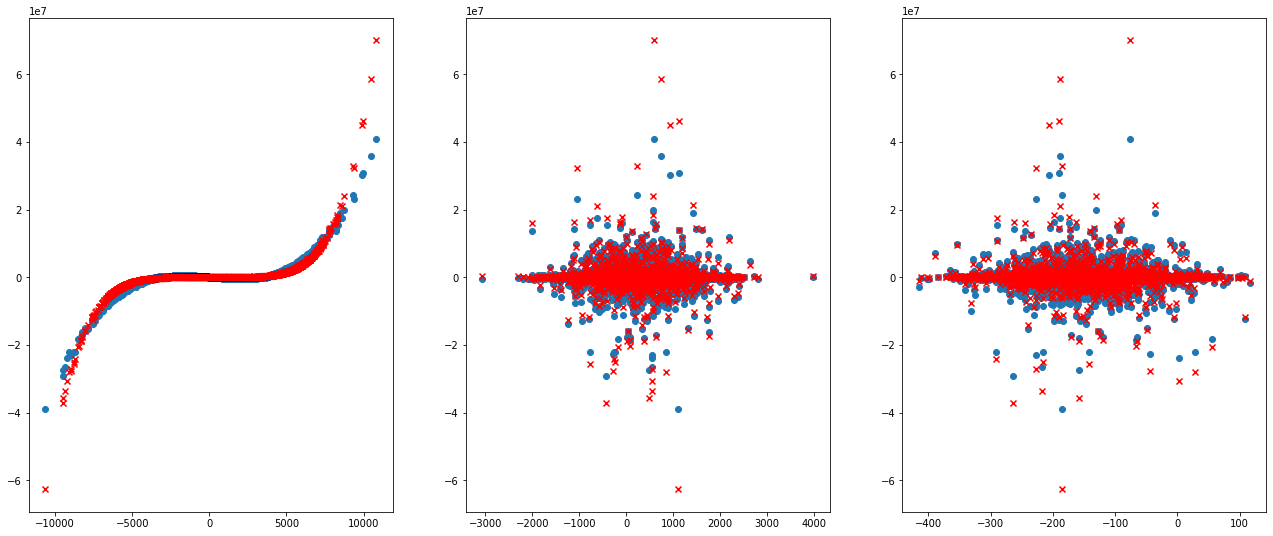

In [ ]:
Y_pred1 = model.predict(X_cv)
plt.figure(figsize=(30,20))
plots=[]
for i in range(3):
  ax=plt.subplot2grid((2,4),(1,i))
  ax.scatter(X_cv[:,i],Y_pred1)
  ax.scatter(X_cv[:,i],Y_cv,marker='x',color='r')

In [24]:
model2 = PolynomialRegression(deg=5,lambda1=0.02,lambda2=0.02,epochs=20000)
#model.Polyfeatures(X_train)
#X_train
model2.fit(X=X_train,Y=Y_train)
print(model2.R2score(X_cv,Y_cv))
print(model2.mae(X_cv,Y_cv))
print(model2.mse(X_cv,Y_cv))

Cost after 0th operation is : 3463399431891.75
Cost after 1000th operation is : 1530869.3279134457


KeyboardInterrupt: ignored

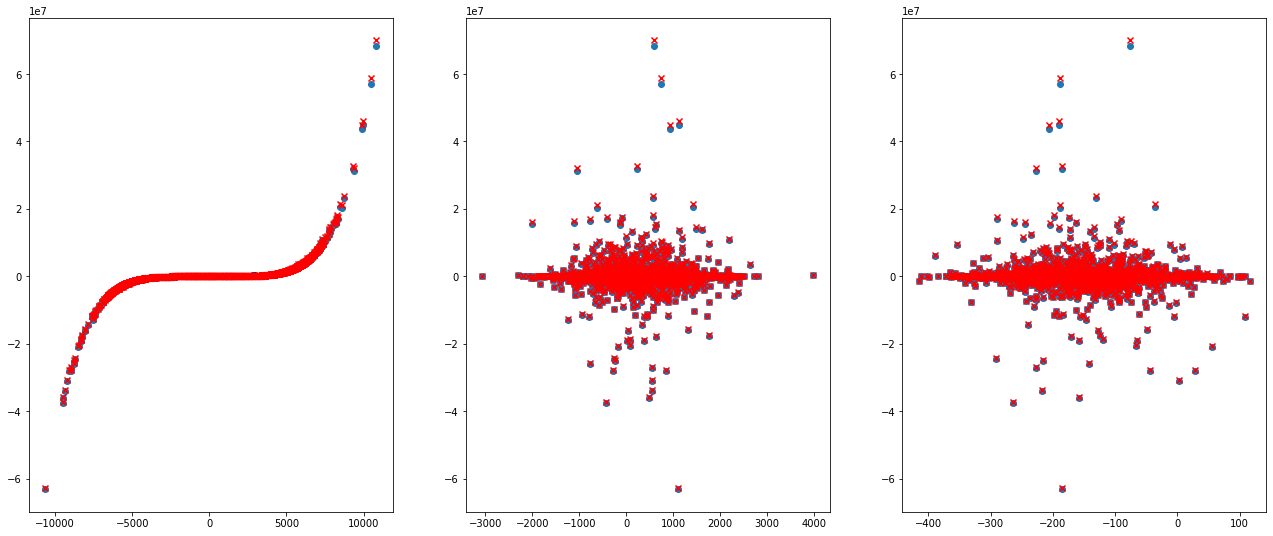

In [ ]:
Y_pred1 = model2.predict(X_cv)
plt.figure(figsize=(30,20))
plots=[]
for i in range(3):
  ax=plt.subplot2grid((2,4),(1,i))
  ax.scatter(X_cv[:,i],Y_pred1)
  ax.scatter(X_cv[:,i],Y_cv,marker='x',color='r')

In [ ]:
Y_pred = model.predict(X_test)
print(model.R2score(X_test,Y_test))
"""Y_mean = Y_test.mean()
R2 = 1- (np.sum(np.square(Y_test-Y_pred)))/(np.sum(np.square(Y_test-Y_mean)))
print(R2)"""

0.9024053789433494


'Y_mean = Y_test.mean()\nR2 = 1- (np.sum(np.square(Y_test-Y_pred)))/(np.sum(np.square(Y_test-Y_mean)))\nprint(R2)'

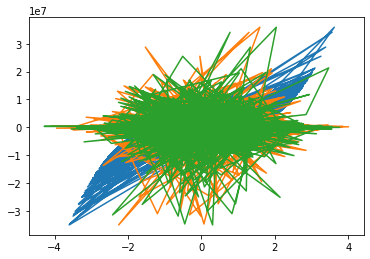

In [ ]:
plt.plot(X_test,Y_pred)

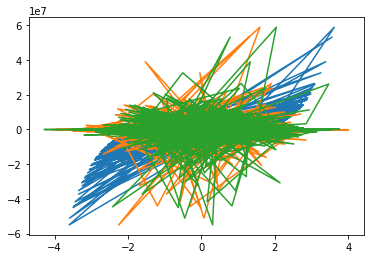

In [ ]:
plt.plot(X_test,Y_test)

In [ ]:
model_final = PolynomialRegression(deg=4)
model_final.tune_hyp_gridsearch(X_train,Y_train,X_cv,Y_cv)

Tried degree: 2, learning rate: 0.1, lambda1: 0, lambda2: 0 ==> got score:- 0.2963030177649376
Tried degree: 2, learning rate: 0.1, lambda1: 0, lambda2: 0.1 ==> got score:- 0.29630318442624437
Tried degree: 2, learning rate: 0.1, lambda1: 0, lambda2: 0.01 ==> got score:- 0.29630303443137507
Tried degree: 2, learning rate: 0.1, lambda1: 0.1, lambda2: 0 ==> got score:- 0.2963030177652951
Tried degree: 2, learning rate: 0.1, lambda1: 0.1, lambda2: 0.1 ==> got score:- 0.29630318442660186
Tried degree: 2, learning rate: 0.1, lambda1: 0.1, lambda2: 0.01 ==> got score:- 0.29630303443173256
Tried degree: 2, learning rate: 0.1, lambda1: 0.01, lambda2: 0 ==> got score:- 0.29630301776497336
Tried degree: 2, learning rate: 0.1, lambda1: 0.01, lambda2: 0.1 ==> got score:- 0.2963031844262801
Tried degree: 2, learning rate: 0.1, lambda1: 0.01, lambda2: 0.01 ==> got score:- 0.2963030344314108
Tried degree: 2, learning rate: 0.01, lambda1: 0, lambda2: 0 ==> got score:- 0.29630301778187695
Tried degree:

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-14-7df3f8d7c46e>:35: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n_samples))*(np.sum((y_pred-Y)**2)+self.lambda1*np.sum(np.abs(self.theta))+self.lambda2*np.sum((self.theta)**2))
<ipython-input-14-7df3f8d7c46e>:35: RuntimeWarning: invalid value encountered in double_scalars
  cost = (1/(2*n_samples))*(np.sum((y_pred-Y)**2)+self.lambda1*np.sum(np.abs(self.theta))+self.lambda2*np.sum((self.theta)**2))
<ipython-input-14-7df3f8d7c46e>:41: RuntimeWarning: invalid value encountered in subtract
  self.theta -= self.lr*grads


Tried degree: 4, learning rate: 0.1, lambda1: 0, lambda2: 0.01 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0, lambda2: 0.01 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0, lambda2: 0.01 ==> got score:- nan


<ipython-input-14-7df3f8d7c46e>:38: RuntimeWarning: invalid value encountered in multiply
  l2 = self.lambda2*self.theta


Tried degree: 4, learning rate: 0.1, lambda1: 0.1, lambda2: 0 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0.1, lambda2: 0.1 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0.1, lambda2: 0.01 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0.01, lambda2: 0 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0.01, lambda2: 0.1 ==> got score:- nan
Tried degree: 4, learning rate: 0.1, lambda1: 0.01, lambda2: 0.01 ==> got score:- nan
Tried degree: 4, learning rate: 0.01, lambda1: 0, lambda2: 0 ==> got score:- 0.9118434255706355
Tried degree: 4, learning rate: 0.01, lambda1: 0, lambda2: 0.1 ==> got score:- 0.9118437406782277
Tried degree: 4, learning rate: 0.01, lambda1: 0, lambda2: 0.01 ==> got score:- 0.9118434570715347
Tried degree: 4, learning rate: 0.01, lambda1: 0.1, lambda2: 0 ==> got score:- 0.9118434255721459
Tried degree: 4, learning rate: 0.01, lambda1: 0.1, lambda2: 0.1 ==> got score:- 0.9118437406837828
Trie

In [ ]:
fine_tune_model = PolynomialRegression(deg=2)
fine_tune_model.rand_search(X_train,Y_train,X_cv,Y_cv)

score:-0.9099090059298587 for degree:-3,for lambda2:-0.01,for learning rate:-0.001
score:-0.9099089542969229 for degree:-3,for lambda2:-0.05,for learning rate:-0.001
score:-0.909908953969468 for degree:-3,for lambda2:-0.05,for learning rate:-0.001
score:-0.9099090044022756 for degree:-3,for lambda2:-0.01,for learning rate:-0.001
score:-0.9111144406344877 for degree:-3,for lambda2:-0.05,for learning rate:-0.01
score:-0.9099089532270837 for degree:-3,for lambda2:-0.05,for learning rate:-0.001
score:-0.9111144464063976 for degree:-3,for lambda2:-0.01,for learning rate:-0.01
score:-0.9099090044163161 for degree:-3,for lambda2:-0.01,for learning rate:-0.001
score:-0.9099090056050297 for degree:-3,for lambda2:-0.01,for learning rate:-0.001
score:-0.9099089538393197 for degree:-3,for lambda2:-0.05,for learning rate:-0.001
score:-0.9125883164195998 for degree:-4,for lambda2:-0.05,for learning rate:-0.01
score:-0.9113273805299685 for degree:-4,for lambda2:-0.05,for learning rate:-0.001
score:-0

<ipython-input-14-5c399cf13203>:39: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n_samples))*(np.sum((err)**2)+(self.reg_alpha)*self.lambda1*np.sum(np.abs(self.theta))+(1-self.reg_alpha)*self.lambda2*np.sum((self.theta)**2))
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-14-5c399cf13203>:39: RuntimeWarning: invalid value encountered in double_scalars
  cost = (1/(2*n_samples))*(np.sum((err)**2)+(self.reg_alpha)*self.lambda1*np.sum(np.abs(self.theta))+(1-self.reg_alpha)*self.lambda2*np.sum((self.theta)**2))
<ipython-input-14-5c399cf13203>:47: RuntimeWarning: invalid value encountered in subtract
  self.theta -= self.lr*grads


score:-nan for degree:-5,for lambda2:-0.05,for learning rate:-0.01
score:-nan for degree:-5,for lambda2:-0.05,for learning rate:-0.01
score:-nan for degree:-5,for lambda2:-0.01,for learning rate:-0.01
score:-0.9992246625209786 for degree:-5,for lambda2:-0.01,for learning rate:-0.001
score:-0.9992246625157332 for degree:-5,for lambda2:-0.01,for learning rate:-0.001
score:-nan for degree:-5,for lambda2:-0.05,for learning rate:-0.01
score:-0.9992246624115624 for degree:-5,for lambda2:-0.05,for learning rate:-0.001
score:-nan for degree:-5,for lambda2:-0.01,for learning rate:-0.01
score:-0.9992246624907991 for degree:-5,for lambda2:-0.01,for learning rate:-0.001
score:-nan for degree:-6,for lambda2:-0.05,for learning rate:-0.001
score:-nan for degree:-6,for lambda2:-0.01,for learning rate:-0.01
score:-nan for degree:-6,for lambda2:-0.01,for learning rate:-0.01
score:-nan for degree:-6,for lambda2:-0.05,for learning rate:-0.01
score:-nan for degree:-6,for lambda2:-0.01,for learning rate:-0.

{'degree': 5, 'lambda2': 0.01, 'learning rate': 0.001}

Cost after 0th operation is : 3463400175145.0864
Cost after 1000th operation is : 1529872.8584484349
Cost after 2000th operation is : 551823.4929907583
Cost after 3000th operation is : 251064.9594962301
Cost after 4000th operation is : 126136.80554214085
Cost after 5000th operation is : 71122.63791771376
Cost after 6000th operation is : 45100.03247223073
Cost after 7000th operation is : 31606.717998738804
Cost after 8000th operation is : 23822.943642153354
Cost after 9000th operation is : 18830.016233328013
Cost after 10000th operation is : 15327.808372369254
Cost after 11000th operation is : 12706.13596425222
Cost after 12000th operation is : 10658.268118776889
Cost after 13000th operation is : 9016.275128503587
Cost after 14000th operation is : 7679.068745410643
Cost after 15000th operation is : 6579.984146188768
Cost after 16000th operation is : 5671.599716214175
Cost after 17000th operation is : 4918.257420556781
Cost after 18000th operation is : 4292.127389866209
Cost after 19000t

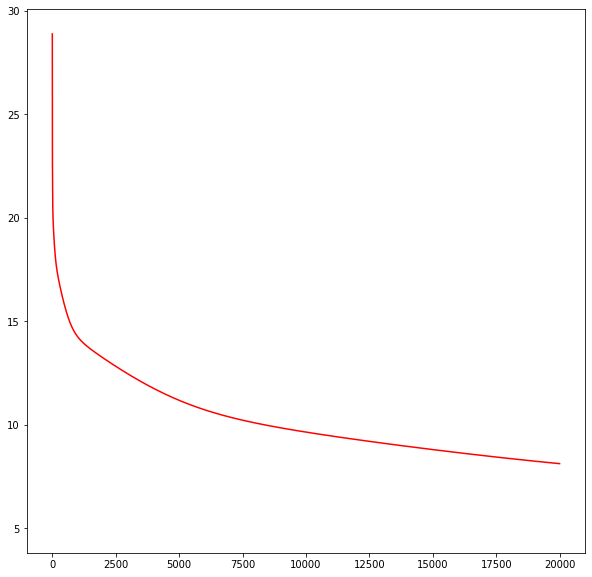

In [25]:
model5 = PolynomialRegression(deg=5,lambda2=0.01,learning_rate=0.001,epochs=20000)
model5.fit(X_train,Y_train,plt_typ='logloss',)

In [30]:
model5.show_metrics(X_cv,Y_cv)

R2:- 0.9990170951944107 MSE:- 6626138440.025683 MAE:- 19513.884628170148 RMSE:- 81401.09606157453


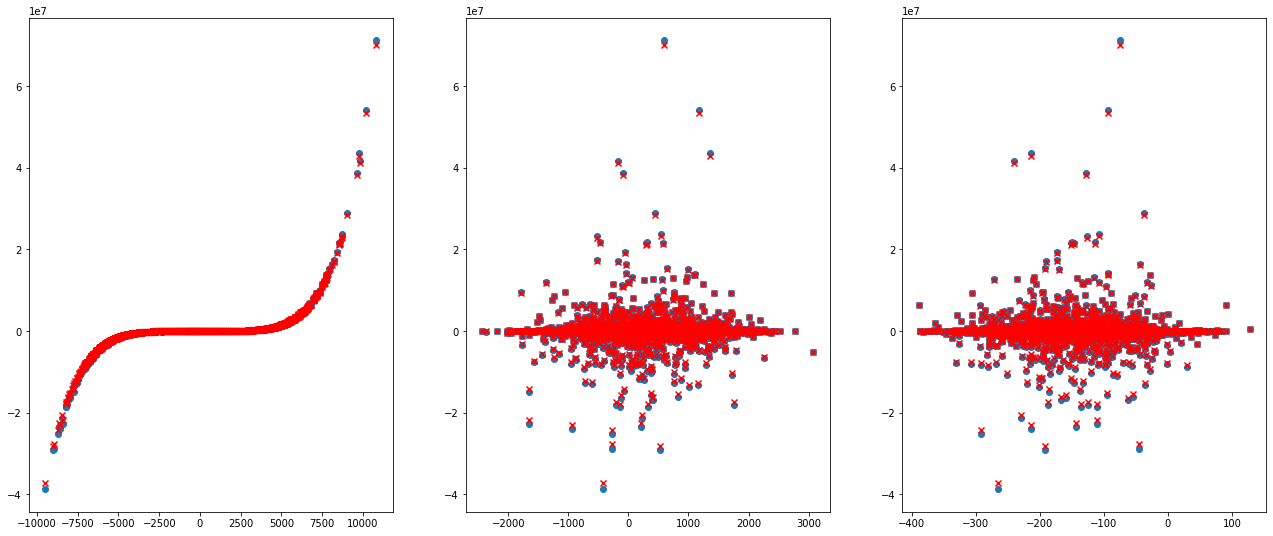

In [27]:
Y_pred1 = model5.predict(X_test)
plt.figure(figsize=(30,20))
plots=[]
for i in range(3):
  ax=plt.subplot2grid((2,4),(1,i))
  ax.scatter(X_test[:,i],Y_pred1)
  ax.scatter(X_test[:,i],Y_test,marker='x',color='r')

# Complete testing

In [41]:
model_test = PolynomialRegression(deg=2)
for deg in [2,3,4,5]:
    print(f"{deg}===>")
    model_test.rand_search(X_train,Y_train,X_cv,Y_cv,deg)


2===>
best score:-2216658.805680621 for {'degree': 2, 'lambda2': 0.01, 'learning rate': 0.01}
3===>
best score:-815733.4675912837 for {'degree': 3, 'lambda2': 0.05, 'learning rate': 0.01}
4===>
best score:-817955.484230131 for {'degree': 4, 'lambda2': 0.05, 'learning rate': 0.01}
5===>


<ipython-input-40-2fe7670382d9>:39: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n_samples))*(np.sum((err)**2)+(self.reg_alpha)*self.lambda1*np.sum(np.abs(self.theta))+(1-self.reg_alpha)*self.lambda2*np.sum((self.theta)**2))
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-40-2fe7670382d9>:39: RuntimeWarning: invalid value encountered in double_scalars
  cost = (1/(2*n_samples))*(np.sum((err)**2)+(self.reg_alpha)*self.lambda1*np.sum(np.abs(self.theta))+(1-self.reg_alpha)*self.lambda2*np.sum((self.theta)**2))
<ipython-input-40-2fe7670382d9>:47: RuntimeWarning: invalid value encountered in subtract
  self.theta -= self.lr*grads


best score:-81404.27842941943 for {'degree': 5, 'lambda2': 0.05, 'learning rate': 0.001}


As we can see for degree 5 the model is performing really good,compared to other degrees.

Cost after 0th operation is : 3371991840563.588
Cost after 1000th operation is : 1472988.6900547205
Cost after 2000th operation is : 531098.9264020645
Cost after 3000th operation is : 241493.64658156355
Cost after 4000th operation is : 122819.08694588917
Cost after 5000th operation is : 71628.20594177807
Cost after 6000th operation is : 47841.75639937582
Cost after 7000th operation is : 35562.72546813814
Cost after 8000th operation is : 28379.685827572433
Cost after 9000th operation is : 23643.798976626316
Cost after 10000th operation is : 20218.466148382206
Cost after 11000th operation is : 17586.17425138292
Cost after 12000th operation is : 15489.963246245105
Cost after 13000th operation is : 13787.332532182509
Cost after 14000th operation is : 12389.438047251466
Cost after 15000th operation is : 11234.976198043449
Cost after 16000th operation is : 10278.41814303229
Cost after 17000th operation is : 9484.326172762792
Cost after 18000th operation is : 8824.34100669438
Cost after 19000

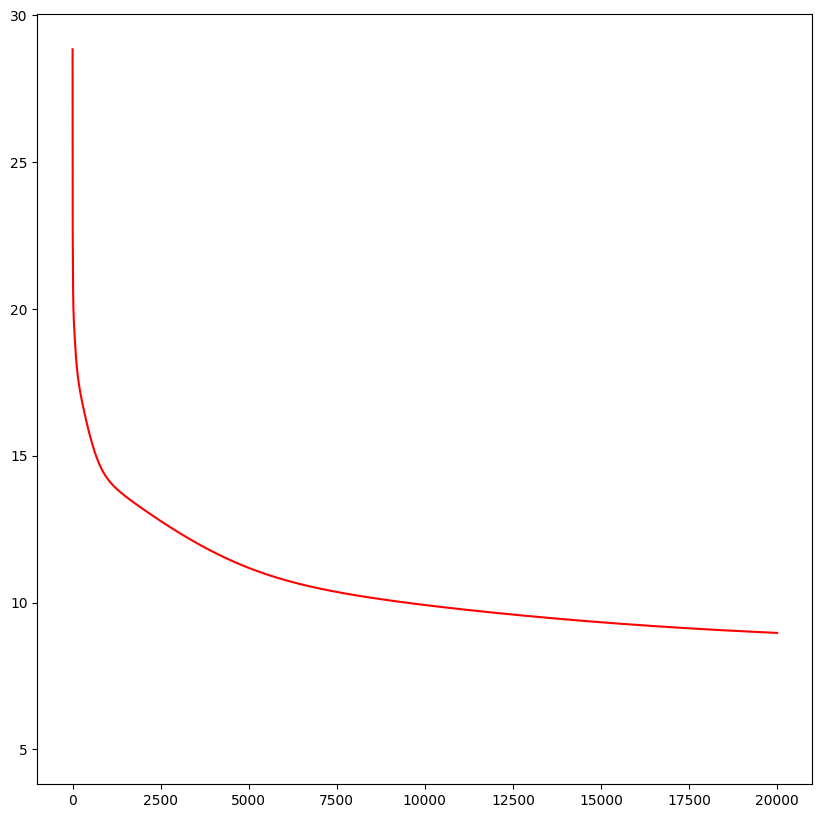

In [7]:
model = PolynomialRegression(deg=5,lambda2=0.05,learning_rate=0.001,epochs=20000)
model.fit(X_train,Y_train,plt_typ='logloss')

In [43]:
model.show_metrics(X_cv,Y_cv)

R2:- 0.9990170952783174 MSE:- 6626137874.378328 MAE:- 19513.884044728748 RMSE:- 81401.09258712888


In [44]:
model.show_metrics(X_test,Y_test)

R2:- 0.9992052501058277 MSE:- 4320624495.152336 MAE:- 14671.26591440149 RMSE:- 65731.45742452647
